In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [2]:
data = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [6]:
data['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [7]:
data['hypertension']= data['hypertension'].apply(lambda x: 'yes' if x==1 else 'no')

In [8]:
data['hypertension'].unique()

array(['no', 'yes'], dtype=object)

In [9]:
data['heart_disease']= data['heart_disease'].apply(lambda x: 'yes' if x==1 else 'no')

In [10]:
data['heart_disease'].unique()

array(['yes', 'no'], dtype=object)

In [11]:
data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [12]:
data = data.drop('id',axis='columns')

In [13]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,no,yes,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,no,no,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,no,yes,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,no,no,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,yes,no,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [14]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [15]:
data.shape

(5110, 11)

In [16]:
data['bmi'] = data['bmi'].fillna(data['bmi'].median())


In [17]:
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   object 
 3   heart_disease      5110 non-null   object 
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 439.3+ KB


In [19]:
import seaborn as sns

In [20]:
import matplotlib.pyplot as plt

<AxesSubplot:>

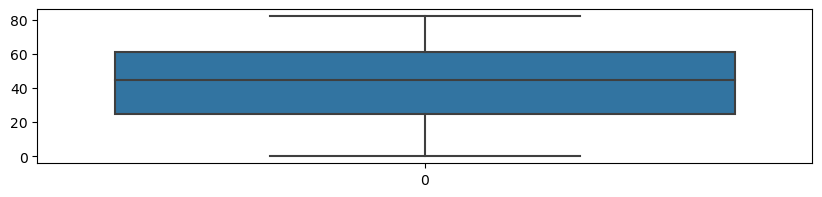

In [21]:
fig,ax = plt.subplots(figsize=(10,2))
sns.boxplot(data.age)

<AxesSubplot:>

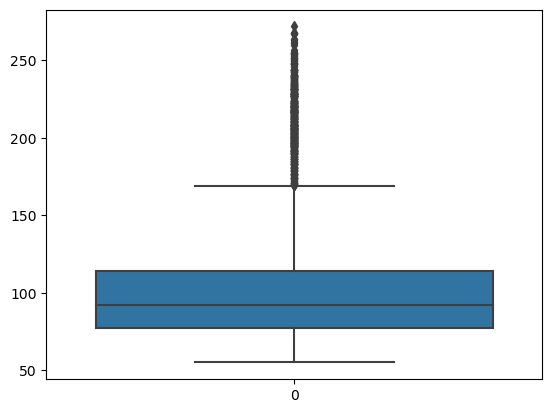

In [22]:
sns.boxplot(data.avg_glucose_level)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

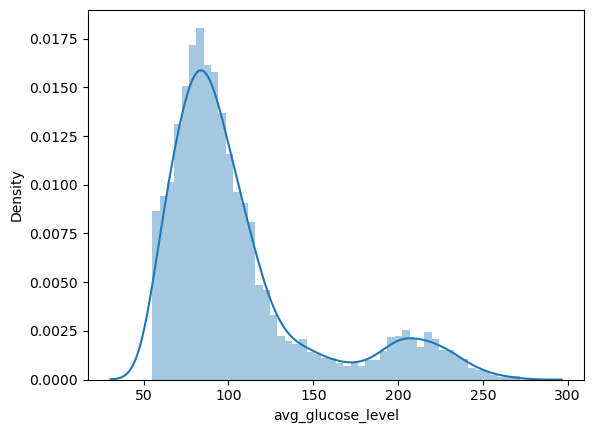

In [23]:
sns.distplot(data.avg_glucose_level)

In [24]:
threshold = 3
outlier = []
for i in data['avg_glucose_level']:
    z = (i-data['avg_glucose_level'].mean())/data['avg_glucose_level'].std()
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)
print('minimum of the outlier list', min(outlier))
## calculate the median for the column excluding the outlier
med = data.loc[data['avg_glucose_level']<= min(outlier), 'avg_glucose_level'].median()
print('Median of the column excluding outliers-->',med)
f = lambda x: med if x>= min(outlier) else x
data['out_avg_glucose_level'] = data['avg_glucose_level'].map(f)
max(data['out_avg_glucose_level'])
data.drop(['avg_glucose_level'], axis=1,inplace = True)

outlier in dataset is [252.72, 243.58, 259.63, 249.31, 263.32, 271.74, 242.52, 250.89, 247.51, 243.53, 242.3, 243.5, 251.6, 247.69, 250.2, 254.6, 254.63, 246.34, 251.46, 267.76, 246.53, 244.28, 251.99, 253.16, 242.84, 249.29, 242.94, 247.48, 266.59, 243.73, 243.59, 250.8, 255.17, 267.61, 260.85, 248.37, 263.56, 247.97, 248.24, 253.93, 254.95, 247.87, 261.67, 256.74, 244.3, 242.62, 243.52, 267.6, 253.86]
minimum of the outlier list 242.3
Median of the column excluding outliers--> 91.60499999999999


<AxesSubplot:>

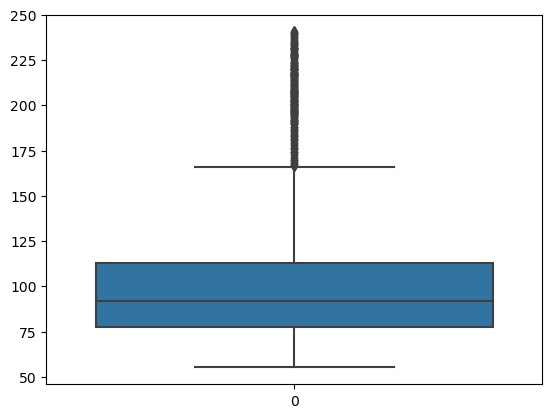

In [25]:
sns.boxplot(data.out_avg_glucose_level)

In [26]:
threshold = 3
outlier = []
for i in data['out_avg_glucose_level']:
    z = (i-data['out_avg_glucose_level'].mean())/data['out_avg_glucose_level'].std()
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)
print('minimum of the outlier list', min(outlier))
## calculate the median for the column excluding the outlier
med = data.loc[data['out_avg_glucose_level']<= min(outlier), 'out_avg_glucose_level'].median()
print('Median of the column excluding outliers-->',med)
f = lambda x: med if x>= min(outlier) else x
data['out_avg_glucose_level1'] = data['out_avg_glucose_level'].map(f)
max(data['out_avg_glucose_level1'])
data.drop(['out_avg_glucose_level'], axis=1,inplace = True)

outlier in dataset is [237.75, 240.09, 235.63, 240.59, 239.07, 233.94, 234.58, 235.85, 239.64, 239.82, 240.71, 237.15, 236.84, 239.52, 237.21, 237.58, 238.53, 237.17, 233.52, 234.82, 237.74, 240.81, 239.28, 233.71, 235.54, 236.14, 239.95, 240.86, 235.45, 238.78, 233.59, 236.79, 239.19, 234.35, 234.27, 239.21, 236.04, 234.5, 235.06, 234.06, 234.45, 240.69, 234.51, 238.27]
minimum of the outlier list 233.52
Median of the column excluding outliers--> 91.60499999999999


<AxesSubplot:>

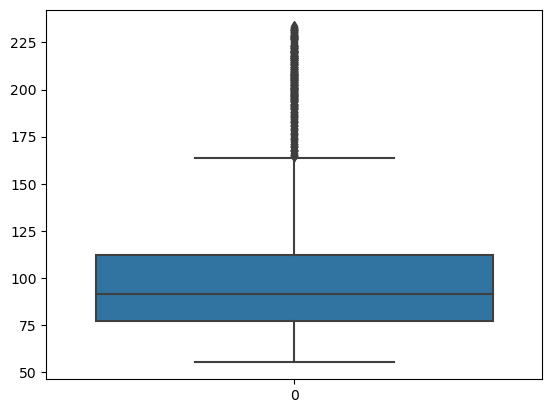

In [27]:
sns.boxplot(data.out_avg_glucose_level1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='out_avg_glucose_level1', ylabel='Density'>

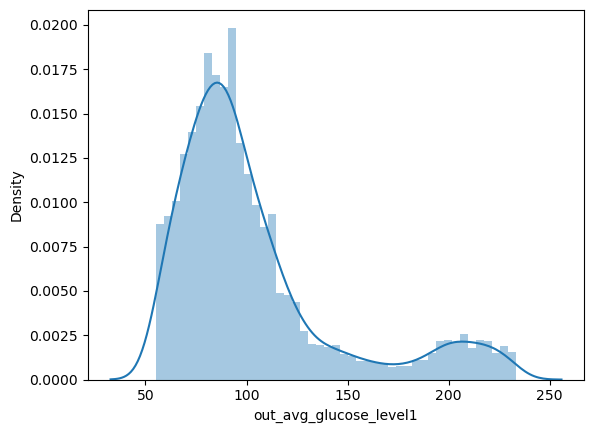

In [28]:
sns.distplot(data.out_avg_glucose_level1)

In [29]:
threshold = 3
outlier = []
for i in data['out_avg_glucose_level1']:
    z = (i-data['out_avg_glucose_level1'].mean())/data['out_avg_glucose_level1'].std()
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)
print('minimum of the outlier list', min(outlier))
## calculate the median for the column excluding the outlier
med = data.loc[data['out_avg_glucose_level1']<= min(outlier), 'out_avg_glucose_level1'].median()
print('Median of the column excluding outliers-->',med)
f = lambda x: med if x>= min(outlier) else x
data['out_avg_glucose_level2'] = data['out_avg_glucose_level1'].map(f)
max(data['out_avg_glucose_level2'])
data.drop(['out_avg_glucose_level1'], axis=1,inplace = True)

outlier in dataset is [228.69, 233.29, 228.7, 228.56, 226.98, 231.61, 231.56, 229.92, 227.1, 228.08, 231.19, 232.89, 227.91, 229.2, 230.68, 229.86, 227.28, 228.7, 227.51, 226.93, 231.76, 227.16, 230.59, 229.21, 228.42, 231.69, 226.88, 227.81, 231.5, 232.81, 229.58, 227.04, 227.94, 231.95, 227.98, 227.74, 227.96, 231.71, 233.3, 232.12, 230.78, 227.89, 231.43, 228.2, 228.92, 227.68, 228.05, 231.31, 233.47, 231.15, 232.64, 229.94, 228.26, 230.74, 228.5, 232.29, 229.73, 227.23, 232.78, 231.54, 231.72]
minimum of the outlier list 226.88
Median of the column excluding outliers--> 91.535


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='out_avg_glucose_level2', ylabel='Density'>

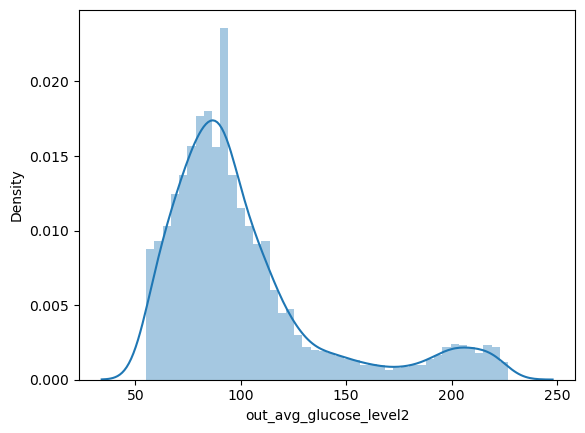

In [30]:
sns.distplot(data.out_avg_glucose_level2)

<AxesSubplot:>

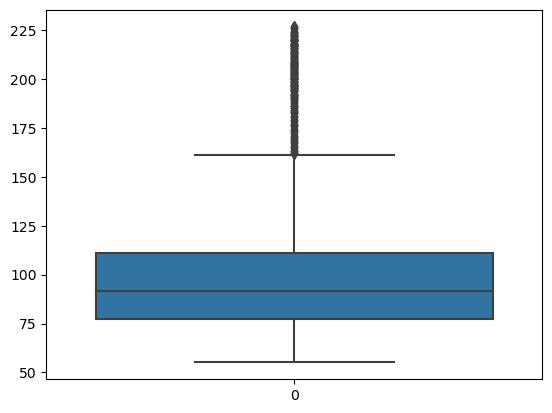

In [31]:
sns.boxplot(data.out_avg_glucose_level2)

In [32]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [33]:
dummified_data = pd.get_dummies(data[['hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']])
dummified_data

,hypertension_no,hypertension_yes,heart_disease_no,heart_disease_yes,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
3,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5106,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0
5107,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5108,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [34]:
data1 = pd.concat([dummified_data,data[['out_avg_glucose_level2','bmi','age','stroke']]],axis=1, join='inner')
data1.head()

,hypertension_no,hypertension_yes,heart_disease_no,heart_disease_yes,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,...,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,out_avg_glucose_level2,bmi,age,stroke
0,1,0,0,1,0,1,0,0,1,0,...,0,1,0,1,0,0,91.535,36.6,67.0,1
1,1,0,1,0,0,1,0,0,0,1,...,1,0,0,0,1,0,202.210,28.1,61.0,1
2,1,0,0,1,0,1,0,0,1,0,...,1,0,0,0,1,0,105.920,32.5,80.0,1
3,1,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,171.230,34.4,49.0,1
4,0,1,1,0,0,1,0,0,0,1,...,1,0,0,0,1,0,174.120,24.0,79.0,1


In [35]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hypertension_no                 5110 non-null   uint8  
 1   hypertension_yes                5110 non-null   uint8  
 2   heart_disease_no                5110 non-null   uint8  
 3   heart_disease_yes               5110 non-null   uint8  
 4   ever_married_No                 5110 non-null   uint8  
 5   ever_married_Yes                5110 non-null   uint8  
 6   work_type_Govt_job              5110 non-null   uint8  
 7   work_type_Never_worked          5110 non-null   uint8  
 8   work_type_Private               5110 non-null   uint8  
 9   work_type_Self-employed         5110 non-null   uint8  
 10  work_type_children              5110 non-null   uint8  
 11  Residence_type_Rural            5110 non-null   uint8  
 12  Residence_type_Urban            51

In [36]:
X = data1[['hypertension_no','hypertension_yes','heart_disease_no','heart_disease_yes','ever_married_No','ever_married_Yes','work_type_Govt_job','work_type_Never_worked','work_type_Private','work_type_Self-employed','work_type_children','Residence_type_Rural','Residence_type_Urban','smoking_status_Unknown','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes','out_avg_glucose_level2','bmi','age']]
Y = data1['stroke']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [38]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [39]:
model = XGBClassifier()
model.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [40]:
y_pred=model.predict(X_test)

In [41]:
print(accuracy_score(y_test,y_pred))

0.9452054794520548


In [42]:
y_train_pred = model.predict(X_train)

In [43]:
print(accuracy_score(y_train,y_train_pred))

0.9960861056751468


In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
print(confusion_matrix(y_test,y_pred))

[[964   4]
 [ 52   2]]


<AxesSubplot:>

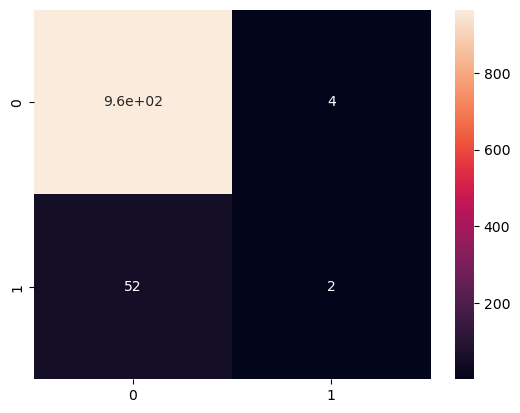

In [46]:
cf_matrix= confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True)